In [68]:
import math
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [13]:
# u(x;0) = 1 - lg(x+0.4)
# u(0;t) = 1.4
# u(0.6;t) = t + 1
# x in [0;0.6]
# h = 0.1
# t in [0;0.01]

In [23]:
h = 0.1
l = 0.6
N = round(l / h) + 1

t_0 = 0.01
dt = 0.001
K = round(t_0 / dt) + 1

In [24]:
x_i = lambda i: i * h
t_j = lambda j: j * dt

In [25]:
T = [[None for i in range(N)] for k in range(K)]

In [26]:
# set u(x;0) = 1 - lg(x + 0.4)
f = lambda x: 1 - math.log10(x + 0.4)

for i in range(len(T[0])):
    T[0][i] = f(x_i(i))

In [27]:
# set u(0;t) = 1.4

for i in range(len(T)):
    T[i][0] = 1.4

In [28]:
# set u(0.6;t) = t + 1

for i in range(len(T)):
    T[i][-1] = t_j(i) + 1

In [33]:
for k in range(K-1):
    for i in range(1, N-1):
        T[k+1][i] = (T[k][i-1] - 2 * T[k][i] + T[k][i+1]) * dt / (h ** 2) + T[k][i]

Text(0.5, 0.98, 'Зависимость температуры от координаты и времени')

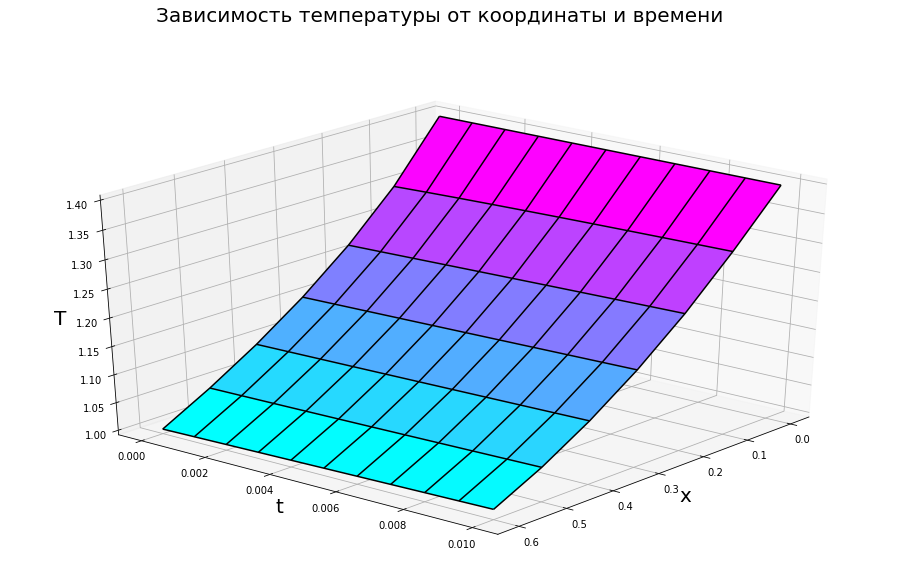

In [39]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, l + h/10, h)
t = np.arange(0, t_0 + dt/10, dt)
X, t = np.meshgrid(X, t)
T = np.array(T)

# Plot the surface.
ax.plot_surface(X, t, np.array((T)), cmap='cool')
ax.plot_wireframe(X, t, np.array((T)), color='black')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("t", fontsize=20)
ax.set_zlabel("T", fontsize=20)
ax.view_init(30, 40)

fig.suptitle('Зависимость температуры от координаты и времени', fontsize=20)

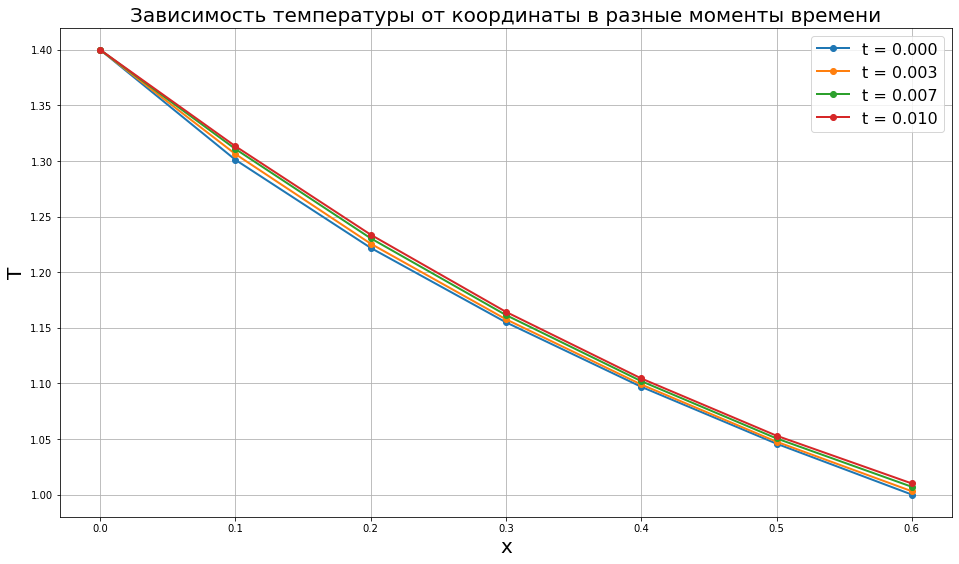

In [65]:
fig = plt.figure(figsize=(16, 9))
plt.grid()
plt.title('Зависимость температуры от координаты в разные моменты времени', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('T', fontsize=20)

x = np.arange(0, l + h/10, h)

y1 = np.array(T[0])
plt.plot(x, y1, linewidth=2, label='t = %.3f' % t_j(0), linestyle='-', marker='o')

y2 = np.array(T[3])
plt.plot(x, y2, linewidth=2, label='t = %.3f' % t_j(3), linestyle='-', marker='o')

y3 = np.array(T[7])
plt.plot(x, y3, linewidth=2, label='t = %.3f' % t_j(7), linestyle='-', marker='o')

y4 = np.array(T[10])
plt.plot(x, y4, linewidth=2, label='t = %.3f' % t_j(10), linestyle='-', marker='o')

plt.legend(fontsize=16)

In [69]:
df = pd.DataFrame(data=T)

In [70]:
df

,0,1,2,3,4,5,6
0,1.4,1.301030,1.221849,1.154902,1.096910,1.045757,1.000
1,1.4,1.303009,1.223072,1.155797,1.097594,1.046297,1.001
2,1.4,1.304714,1.224338,1.156705,1.098285,1.046897,1.002
3,1.4,1.306205,1.225613,1.157626,1.098988,1.047546,1.003
4,1.4,1.307525,1.226873,1.158561,1.099707,1.048236,1.004
5,1.4,1.308708,1.228107,1.159507,1.100446,1.048959,1.005
6,1.4,1.309777,1.229307,1.160461,1.101203,1.049712,1.006
7,1.4,1.310752,1.230470,1.161420,1.101980,1.050490,1.007
8,1.4,1.311649,1.231593,1.162381,1.102775,1.051290,1.008
9,1.4,1.312478,1.232677,1.163341,1.103587,1.052109,1.009
